In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation

# Objetivo y competencias

1. Resolver una ecuación diferencial de primer orden con el método de diferencias finitas
2. Curso de ecuaciones diferenciales parciales.

# Metodología

1. Discretizar los operadores diferenciales.
2. Encontrar el mapa para la discreticación temporal.

In [2]:
Nx = 100
Nt = 200
x = np.linspace(-4.,4.,Nx)
t = np.linspace(0.,1.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]

c = 2.
lambda_ = c*dt/(2*dx)

In [3]:
def ui(x):
    return np.exp(-x**2)

In [6]:
def InitT():
    
    u = np.zeros((Nt,Nx))
    u[0,:] = ui(x)
    
    return u

In [7]:
u = InitT()

<IPython.core.display.Javascript object>


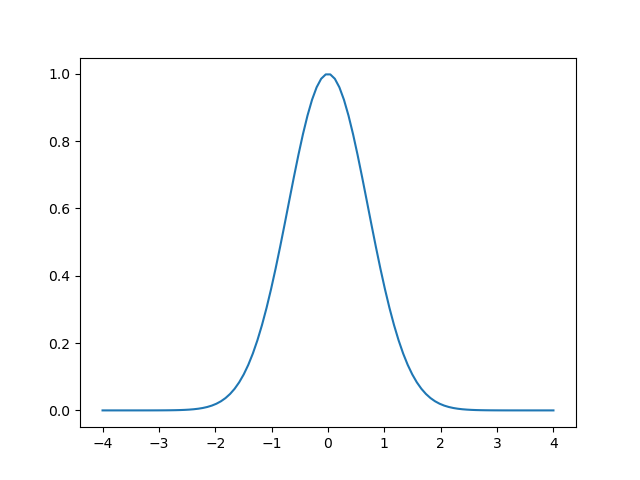

In [8]:
plt.plot(x,u[0,:])

In [9]:
def GetSolution():
    
    for l in range(1,len(t)):
        for i in range(1,len(x)-1):
            u[l,i] = lambda_*( u[l-1,i+1] - u[l-1,i-1] ) + u[l-1,i] 

In [10]:
GetSolution()

<IPython.core.display.Javascript object>


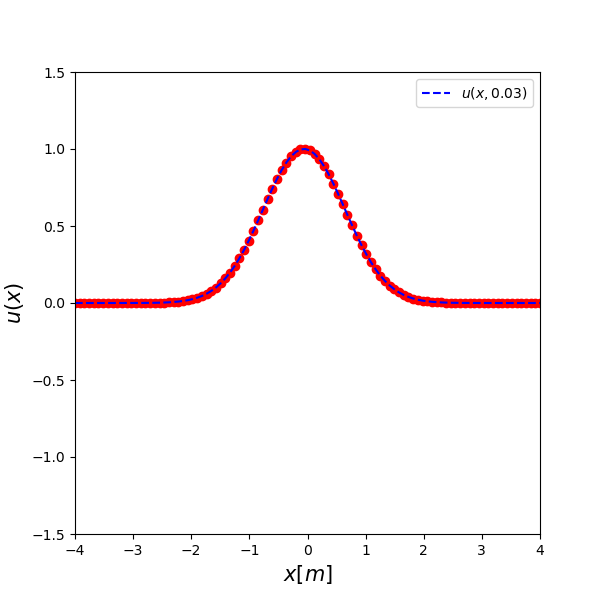

In [11]:
# Zona de animacion
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-1.5,1.5)
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'$u(x)$', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.scatter(x,u[i,:], marker='o', color='r')
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)